In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('../data/preprocessed-essay.csv')

In [3]:
def string_to_list(string):
    return string.split()

In [4]:
def nan_to_blank(val):
    if pd.isna(val) or val is None:
        return ''
    else:
        return val

In [5]:
df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(string_to_list)
df_train['cleaned_tokenize_text'] = df_train['cleaned_tokenize_text'].apply(string_to_list)
df_train['corrected_text'] = df_train['corrected_text'].apply(string_to_list)
df_train['mistakes'] = df_train['mistakes'].apply(nan_to_blank)
df_train['mistakes'] = df_train['mistakes'].apply(string_to_list)

In [6]:
low_df = df_train[df_train['Score_Category'] == 'low'].reset_index()
med_df = df_train[df_train['Score_Category'] == 'medium'].reset_index()
high_df = df_train[df_train['Score_Category'] == 'high'].reset_index()

print('Low Scored Essays Shape: ', low_df.shape)
print('Medium Scored Essays Shape: ', med_df.shape)
print('High Scored Essays Shape: ', high_df.shape)

Low Scored Essays Shape:  (263, 22)
Medium Scored Essays Shape:  (3485, 22)
High Scored Essays Shape:  (163, 22)


In [7]:
low_df['full_text'][0]

"I think it's a good idea for the estudnets to commit to a career at a young age. In addiction, the students are expected to identify a career they want and use the best for them. So the students can study in higt school and select to guide them to career in specific they want.\n\nFisrt, In high school all the students have diffents dream on the world. Some students dream to be a Doctor, arctecture, teacher, and nurse, ect. Is a good oportunity to have a good education and a make a good person and helpfull. Then, the students can have a better life and good jobs.\n\nSometimes the students in young age estared to think about what carrer is better for them. Others think what career is usefull to make a good money and have a better class social. But all the students think diferent the others and we have to respet they decicion about they future.\n\nsecondly, In my opinion is is good to think or dream in biger. In my potition my family do not have all lot of money to go to the university a

In [8]:
high_df['full_text'][0]

'The best time in life is when you become yourself. I agree that the greatest accomplishment, is when you be yourself in a world that constantly trying to make you something else. Because you make your own choices, you become more happy, and you respect others.\n\nFirst, you make your own choices by being yourself. Becoming yourself means that you should be able to make your own choices and not be shy or afraid of what you\'re doing. Because you\'re defining yourself by doing those things that you want. Some people follow others, therefore, they don\'t make their own choices. People are afraid to make their own choice because they don\'t want to get rejected or be wrong. In this world, most of the teenagers act and follow the people who are strong and bullies. The reason they follow them and make the same choices they make, is because they\'re afraid that they will get beaten up and be left out. Personally when I came to the United States I used to follow other, because I thought they 

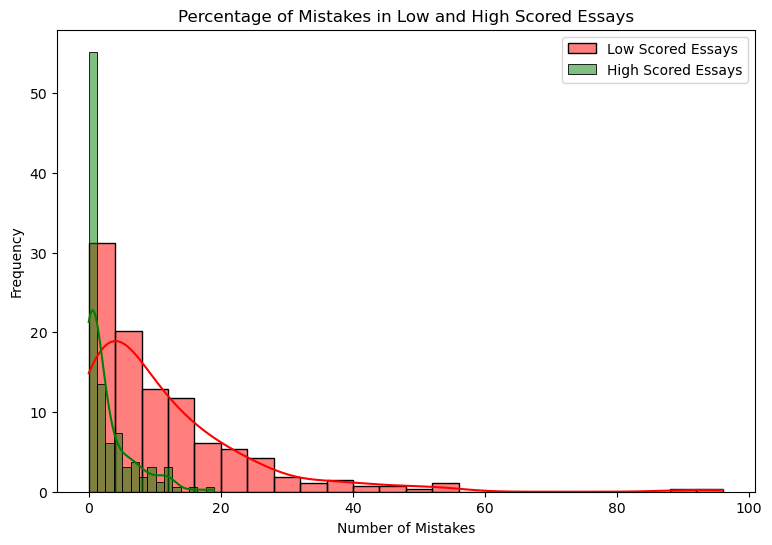

0
96
0
19


In [9]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the histograms of num_mistakes for low_df and high_df
sns.histplot(data=low_df, x='num_mistakes', color='red', alpha=0.5, stat='percent', label='Low Scored Essays', kde=True)
sns.histplot(data=high_df, x='num_mistakes', color='green', alpha=0.5, stat='percent', label='High Scored Essays', kde=True)

# Set the chart title and axis labels
plt.title('Percentage of Mistakes in Low and High Scored Essays')
plt.xlabel('Number of Mistakes')
plt.ylabel('Frequency')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

print(low_df['num_mistakes'].min())
print(low_df['num_mistakes'].max())
print(high_df['num_mistakes'].min())
print(high_df['num_mistakes'].max())

low_word_count_mean 12
high_word_count_mean 26
low_sent_len_mean 46
high_sent_len_mean 22


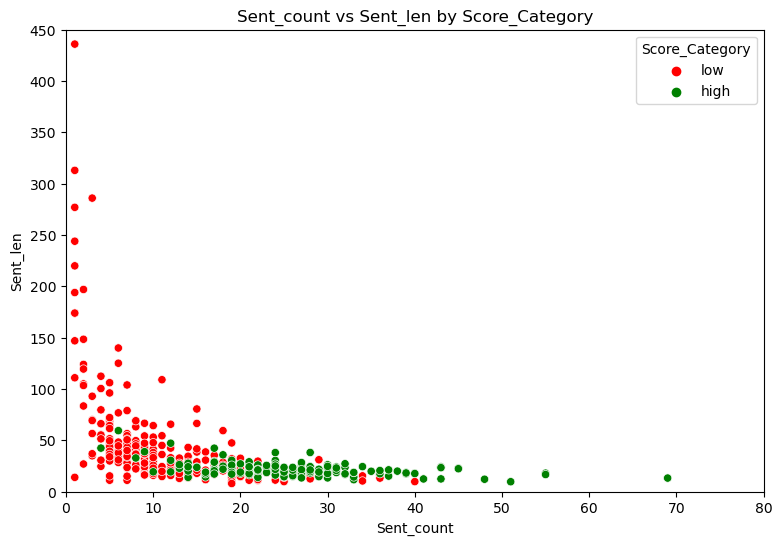

In [10]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='sent_count', y='sent_len', hue='Score_Category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='sent_count', y='sent_len', hue='Score_Category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 80)
plt.ylim(0, 450)

# Calculate and plot the average word_count for low and high scored essays
low_sent_count_mean = round(low_df['sent_count'].mean())
high_sent_count_mean = round(high_df['sent_count'].mean())
print('low_word_count_mean', low_sent_count_mean)
print('high_word_count_mean',high_sent_count_mean)

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())
print('low_sent_len_mean', low_sent_len_mean)
print('high_sent_len_mean',high_sent_len_mean)

# Add plot titles and labels
plt.title('Sent_count vs Sent_len by Score_Category')
plt.xlabel('Sent_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

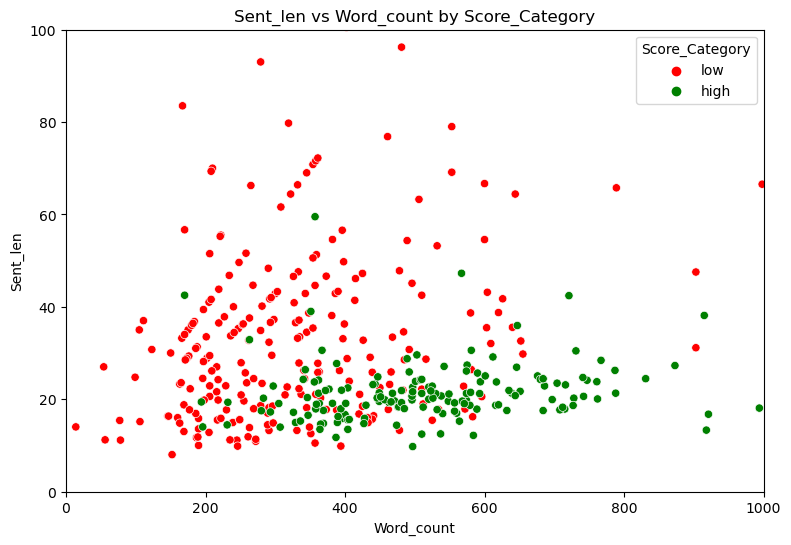

In [11]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='word_count', y='sent_len', hue='Score_Category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='word_count', y='sent_len', hue='Score_Category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 1000)
plt.ylim(0, 100)

# Calculate and plot the average word_count for low and high scored essays
low_word_count_mean = round(low_df['word_count'].mean())
high_word_count_mean = round(high_df['word_count'].mean())

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

# Add plot titles and labels
plt.title('Sent_len vs Word_count by Score_Category')
plt.xlabel('Word_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

#Try histogram

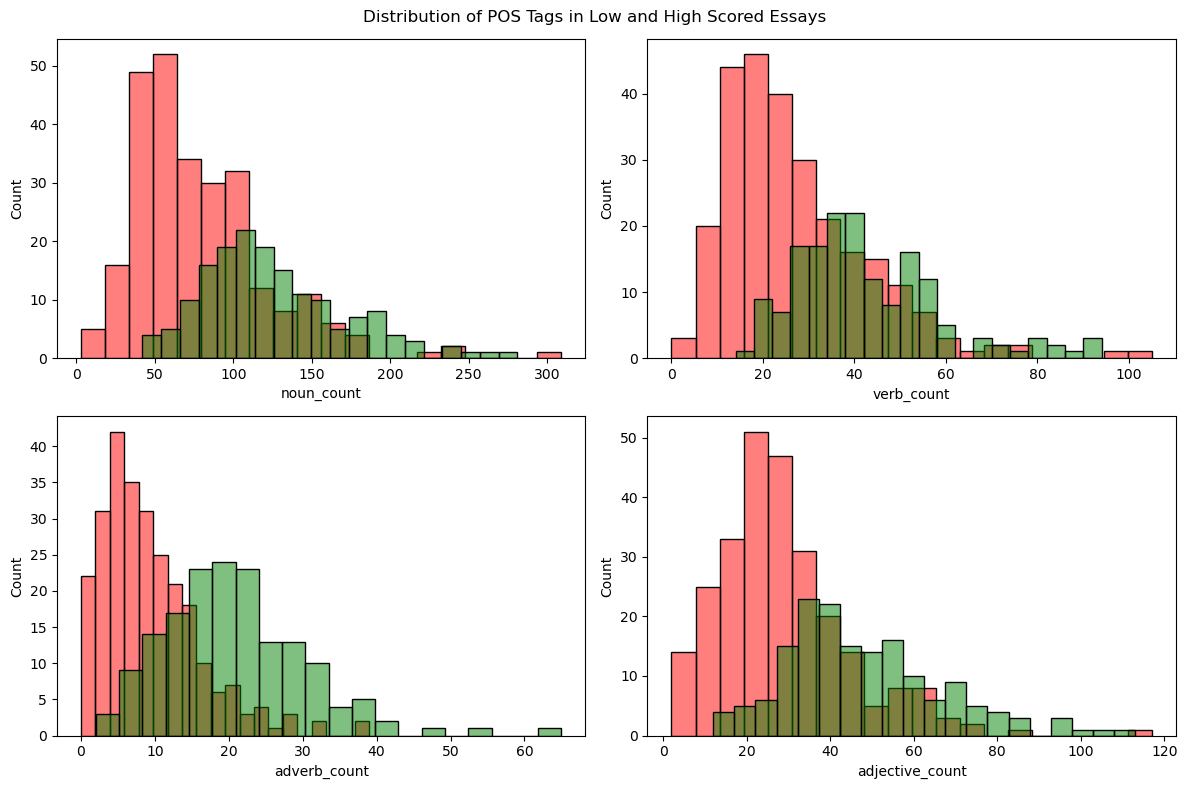

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='noun_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 0])
sns.histplot(x='noun_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 0])

sns.histplot(x='verb_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 1])
sns.histplot(x='verb_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 1])

sns.histplot(x='adverb_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 0])
sns.histplot(x='adverb_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 0])

sns.histplot(x='adjective_count', data=low_df, bins=20, color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 1])
sns.histplot(x='adjective_count', data=high_df, bins=20, color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 1])

plt.suptitle('Distribution of POS Tags in Low and High Scored Essays')
plt.tight_layout()

plt.show()

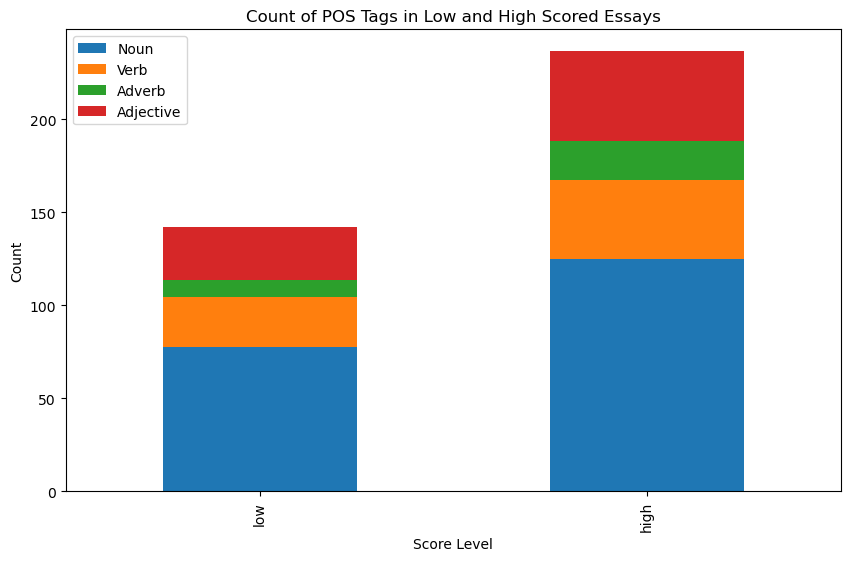

In [13]:
# create a dataframe with aggregated counts for each POS tag and score level
pos_counts = pd.concat([low_df.mean(), high_df.mean()], axis=1)
pos_counts.columns = ['low', 'high']
pos_counts = pos_counts[['low', 'high']].T[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']]

# plot the stacked bar chart
pos_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Score Level')
plt.ylabel('Count')
plt.title('Count of POS Tags in Low and High Scored Essays')
plt.legend(['Noun', 'Verb', 'Adverb', 'Adjective'])
plt.show()

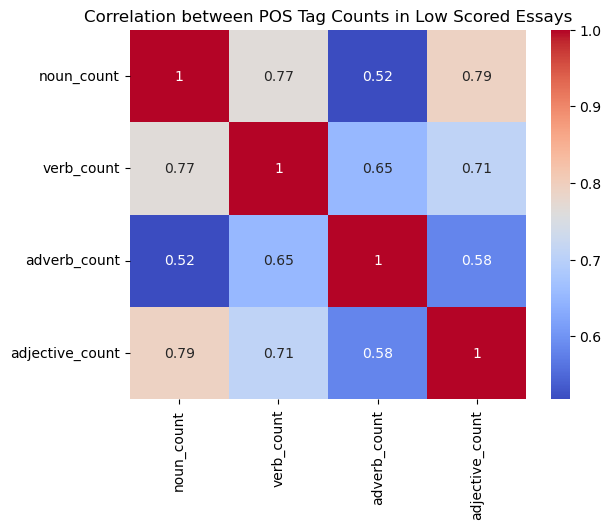

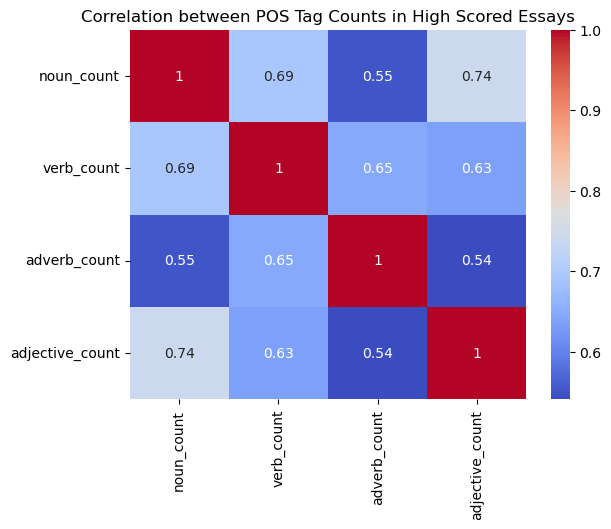

In [14]:
# Calculate the correlation matrix for the four columns in low_df
low_corr = low_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(low_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag Counts in Low Scored Essays')

# Display the chart
plt.show()

# Calculate the correlation matrix for the four columns in high_df
high_corr = high_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(high_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag Counts in High Scored Essays')

# Display the chart
plt.show()